**TOPIC MODELLING USING LATENT DIRICHLET ALLOCATION**

In [ ]:
#Installing Libraries
import pandas as pd
import numpy as np
import spacy
import nltk
import time
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
!pip install pyLDAvis
import pyLDAvis.lda_model

In [71]:
#Import the dataset from my files
from google.colab import files
dataset = files.upload()

Saving nigerian_presidential_election_2023_tweets.csv to nigerian_presidential_election_2023_tweets (1).csv


In [113]:
#Segmenting necessary data
import io
fulldata = pd.read_csv(io.BytesIO(dataset['nigerian_presidential_election_2023_tweets.csv']))
data = fulldata['text']
data.head()
len(data)

86238

In [ ]:
#Preprocessing requirements for the Corpus
SW = stopwords.words("english")
SW.extend(['from', 'nigeriadecides2023', 're', 'u', 'dey', 'na', 'the', 'live', 'now', 'go', 'let','us', 'i', 'new', 'one', 'i', 'no', 'like','see', '000'])
no_url = r'https?:\S*'''

texts = data
texts = texts.str.replace(no_url, '')
texts = texts.str.replace('\W', ' ', regex=True)
texts = texts.str.replace('[_"\-;%()|+&=*%.,!?:#$@\[\]/]', '')
texts = list(texts.apply(str))
texts = [word for word in texts if word not in SW]
texts = list(map(str.lower,texts))

print(len(texts))
texts[0:4]

In [75]:
#Exploratory data visualizations using WordCloud and Histograms
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import seaborn as sns
import string


corp = str(texts)
corp = corp.lower()
corpus = corp.split()
corpus = [word for word in corpus if word not in SW]
corpus = str(corpus)
corpus = corpus.translate(str.maketrans('', '', string.punctuation))

Counter = Counter(corpus.split())
topwords = Counter.most_common(50)
topwords #top 50 terms with their document frequency

[('nigeria', 10421),
 ('election', 8537),
 ('tinubu', 8320),
 ('vote', 8143),
 ('obi', 8072),
 ('obidatti', 6481),
 ('state', 5811),
 ('234radio', 5112),
 ('apc', 4950),
 ('nigeriadecides2023', 4932),
 ('support', 4419),
 ('inec', 4266),
 ('president', 4099),
 ('peter', 4073),
 ('people', 4063),
 ('the', 4017),
 ('listen', 3979),
 ('presidential', 3888),
 ('peterobi', 3814),
 ('now', 3746),
 ('playing', 3733),
 ('atiku', 3697),
 ('2023', 3563),
 ('nigerians', 3219),
 ('lagos', 3151),
 ('elections', 3150),
 ('amp', 2951),
 ('i', 2901),
 ('results', 2798),
 ('party', 2772),
 ('lp', 2709),
 ('inecnigeria', 2624),
 ('god', 2569),
 ('polling', 2537),
 ('time', 2534),
 ('troops', 2506),
 ('pdp', 2441),
 ('security', 2364),
 ('please', 2351),
 ('make', 2312),
 ('candidate', 2198),
 ('download', 2172),
 ('unit', 2168),
 ('know', 2121),
 ('today', 2086),
 ('nigerian', 2018),
 ('man', 2009),
 ('get', 1953),
 ('labour', 1892),
 ('country', 1835)]

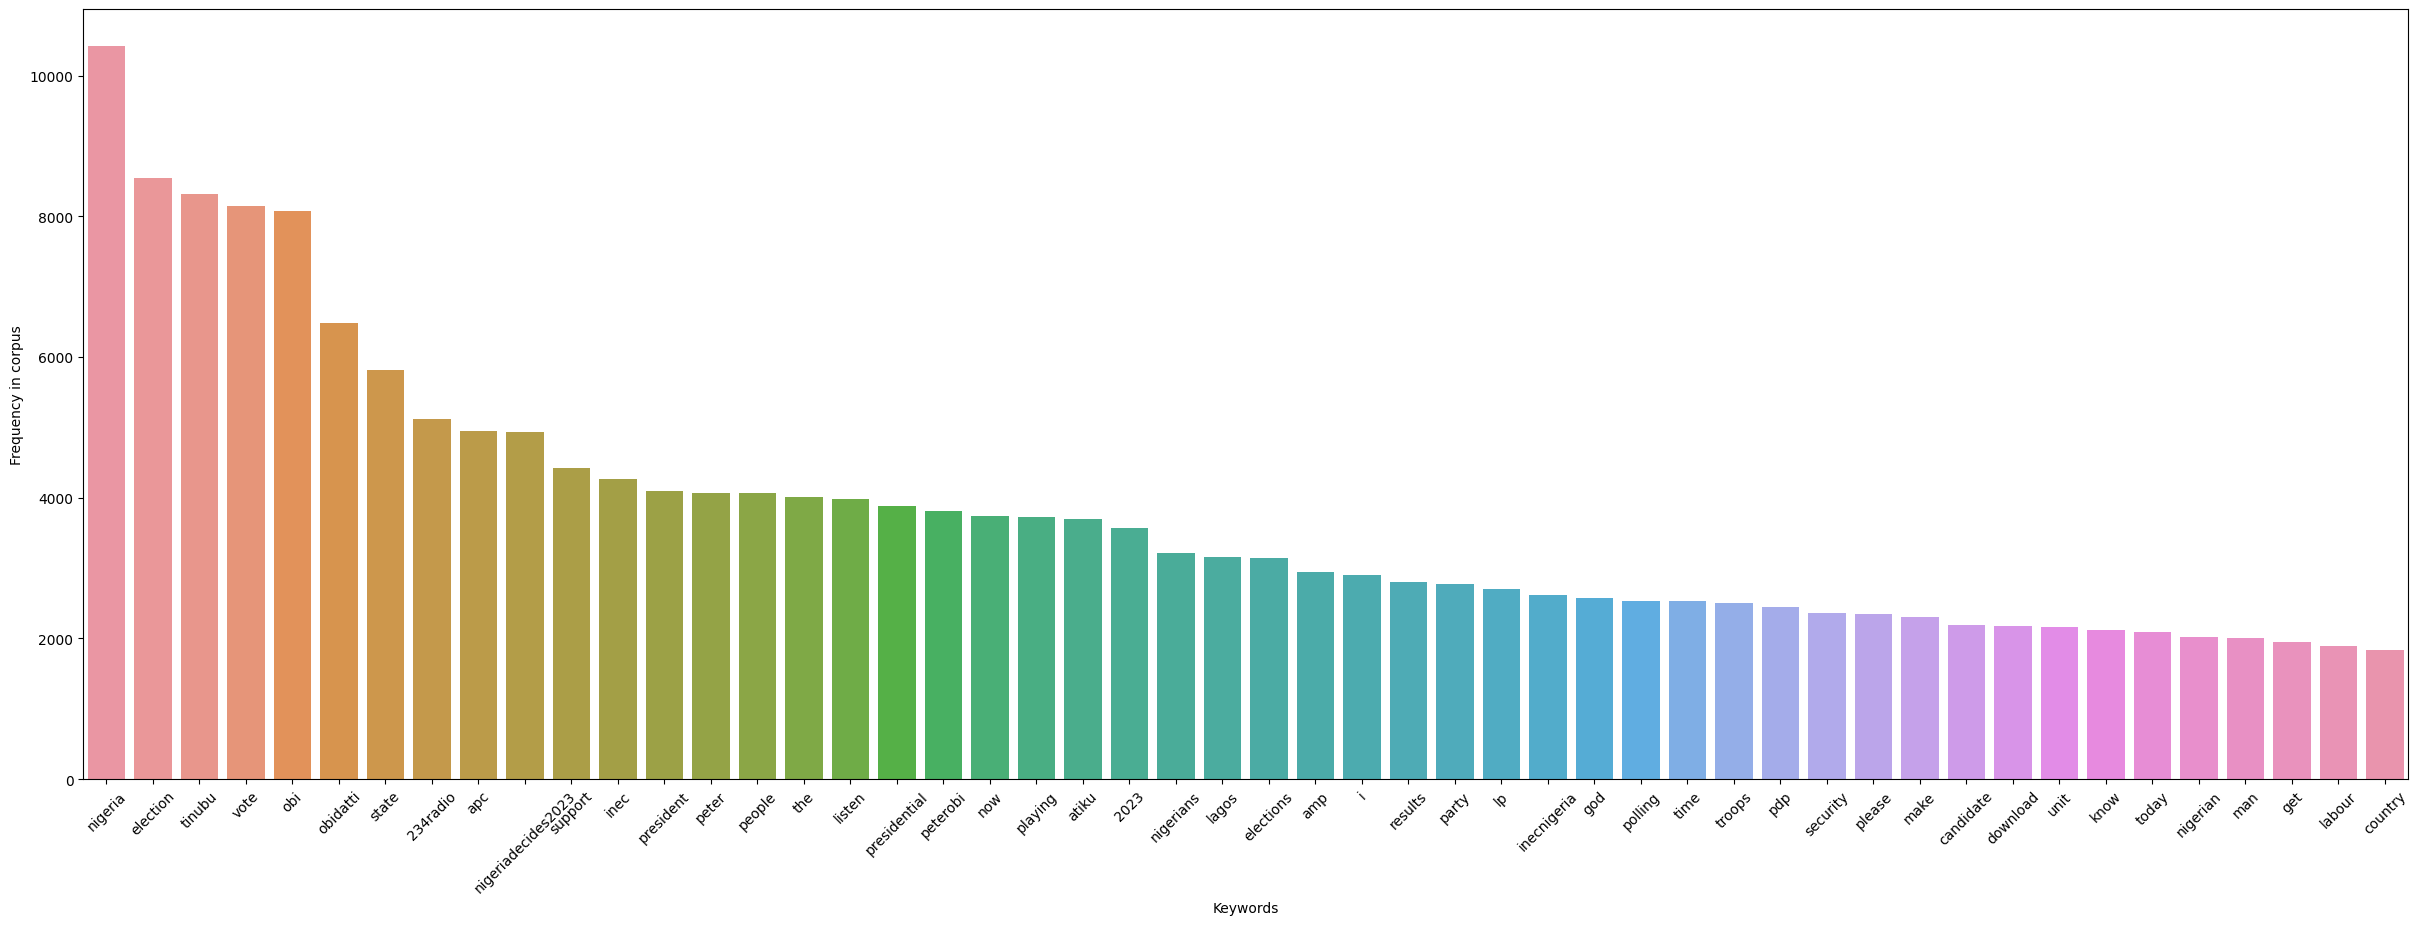

In [78]:
#Plotting the Histogram
hist = plt.figure(1, figsize = (30,10))
info = pd.DataFrame(topwords, columns = ("Keywords", "Frequency in corpus"))
sns.barplot(x = "Keywords", y = "Frequency in corpus", data = info)
plt.xticks(rotation=45);

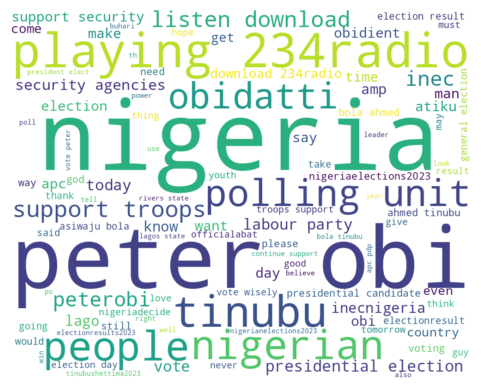

In [79]:
#Plotting the WordCloud
pic = WordCloud(
    background_color="white",
    contour_color = "steelblue",
    stopwords=SW,
    max_words= 100,
    height = 800,
    width = 1000
)
pic.generate(corpus)
plt.imshow(pic, interpolation= "bilinear")
plt.axis("off")
#plt.title('Top 100 Words', fontsize=23)
plt.show()

In [80]:
#Generating the document term matrix
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(max_df=0.9, min_df=5, stop_words= SW)

the_matrix = count.fit_transform(texts)

the_matrix

<86238x12245 sparse matrix of type '<class 'numpy.int64'>'
	with 724367 stored elements in Compressed Sparse Row format>

In [81]:
#Fitting the DTM into the model
start = time.perf_counter()
from sklearn.decomposition import LatentDirichletAllocation

mods = LatentDirichletAllocation(n_components=7, random_state=42)
mods.fit(the_matrix)

end = time.perf_counter()
print('Model execution time:',end-start)

Model execution time: 195.10837092499787


In [82]:
#Grab topics
len(mods.components_) #predetermined number of topics

tops = mods.components_[1] #for the first topic
tops.argsort()

#to retrieve the index for the top 10 words in a topic
#tops.argsort()[-10:]

array([7743, 7711, 1018, ...,  229, 7584, 3962])

In [84]:
#Grab the actual vocab of words from the model array
#len(count.get_feature_names_out())
#type(count.get_feature_names_out())
count.get_feature_names_out()[3962] #to check what the word is from the numbers in the above array

'election'

In [85]:
#Retrieving the highest prob words per topic
for inx, top in enumerate(mods.components_):
  print(f"The top 10 words for Topic #{inx}")
  print([count.get_feature_names_out()[i] for i in top.argsort()[-10:]])
  print('\n')
  print('\n')

The top 10 words for Topic #0
['lp', 'nigeriaelections2023', 'please', 'peter', 'peterobi', 'god', 'nigeria', 'obi', 'obidatti', 'vote']




The top 10 words for Topic #1
['know', 'nigerian', 'presidential', 'general', 'nigerians', 'day', 'elections', '2023', 'nigeria', 'election']




The top 10 words for Topic #2
['mbuhari', 'centre', 'watch', 'video', 'national', '2023', 'amp', 'agencies', 'support', 'security']




The top 10 words for Topic #3
['love', 'amp', 'davido', 'app', 'mobile', 'ft', 'download', 'playing', 'listen', '234radio']




The top 10 words for Topic #4
['candidate', 'party', 'tinubu', 'election', 'pdp', 'support', 'troops', 'presidential', 'state', 'apc']




The top 10 words for Topic #5
['officialabat', 'man', 'peterobi', 'peter', 'people', 'atiku', 'nigeria', 'president', 'obi', 'tinubu']




The top 10 words for Topic #6
['lga', 'pu', 'ward', 'time', 'inecnigeria', 'results', 'unit', 'polling', 'state', 'inec']






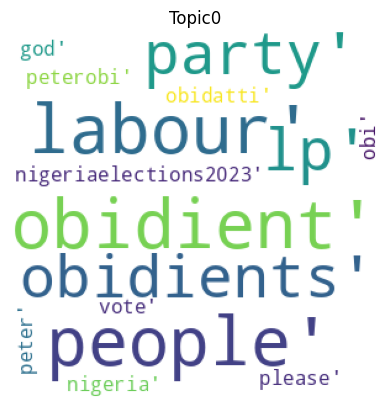

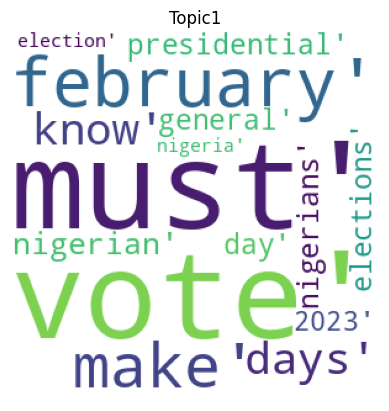

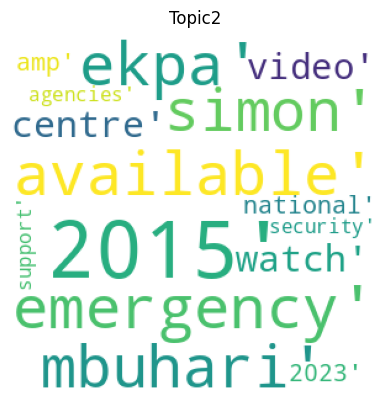

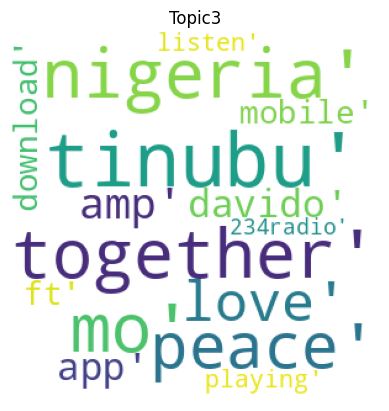

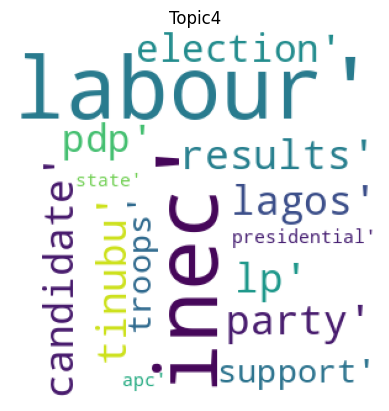

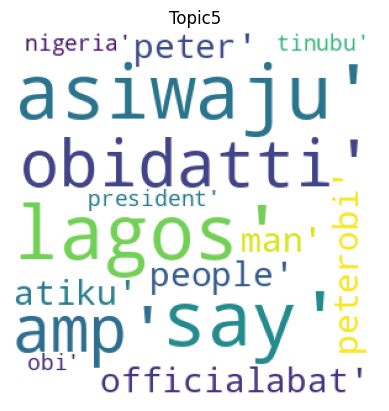

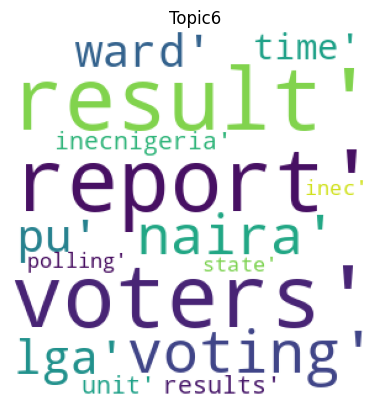

In [108]:
#WordCloud of Top 15 words in LDA topics
for inx, top in enumerate(mods.components_):
  stuff = [count.get_feature_names_out()[i] for i in top.argsort()[-15:]]
  stuff = str(stuff)
  wc = WordCloud(width=300, height=300,background_color='white').generate(stuff)
  plt.imshow(wc)
  plt.title(f"Topic{inx}")
  plt.axis("off")
  plt.show()

In [101]:
#Creating a Vis plot of the model results
pyLDAvis.enable_notebook()

looky = pyLDAvis.lda_model.prepare(mods, the_matrix, count, mds='tsne')
looky

PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
5      16.609692  -7.588242       1        1  24.039727
1     -11.622681  22.170387       2        1  17.632103
0      28.321102  31.728357       3        1  16.421538
4      11.101303  15.440103       4        1  13.995705
6       5.570358  38.502247       5        1  12.912982
2      -6.170388  -0.923862       6        1   7.685077
3      33.916958   8.639761       7        1   7.312868, topic_info=            Term         Freq        Total Category  logprob  loglift
265     234radio  5353.000000  5353.000000  Default  30.0000  30.0000
11762       vote  7881.000000  7881.000000  Default  29.0000  29.0000
6709      listen  4167.000000  4167.000000  Default  28.0000  28.0000
8543     playing  3909.000000  3909.000000  Default  27.0000  27.0000
7771    obidatti  6262.000000  6262.000000  Default  26.0000  26.0000
...          ...          ...          ...      ...      ...      ...
11079     tinubu   194.409996  8051.296779   Topic7  -5.6416  -1.1081
1396     asiwaju   157.923279  1489.588811   Topic7  -5.8495   0.3714
1993        bola   141.394925  1489.323244   Topic7  -5.9600   0.2610
2266   candidate   143.441439  2175.355067   Topic7  -5.9457  -0.1035
7304          mr   131.247709   645.646843   Topic7  -6.0345   1.0224

[481 rows x 6 columns], token_table=       Topic      Freq    Term
term                          
1          5  0.988868     001
11         5  0.991401    00pm
69         2  0.078917      10
69         3  0.083652      10
69         4  0.254111      10
...      ...       ...     ...
12169      4  0.009260   yiaga
12176      1  0.929681  yoruba
12176      2  0.003251  yoruba
12176      6  0.061762  yoruba
12176      7  0.003251  yoruba

[1001 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 2, 1, 5, 7, 3, 4])

**TOPIC MODELLING USING NON-NEGATIVE MATRIX FACTORIZATION**

In [102]:
#Creating the document term matrix using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_df=0.9, min_df=5, stop_words = SW)
matrix2 = tfidf.fit_transform(texts)

matrix2

<86238x12245 sparse matrix of type '<class 'numpy.float64'>'
	with 724367 stored elements in Compressed Sparse Row format>

In [103]:
#Fitting the NMF model
start = time.perf_counter()

from sklearn.decomposition import NMF
nmf_mod = NMF(n_components=7, random_state=42)
nmf_mod.fit(matrix2)

end = time.perf_counter()
print('Model execution time:',end-start)

Model execution time: 3.5771833549988514


In [37]:
tfidf.get_feature_names_out()

array(['00', '001', '002', ..., '𝗕𝗥𝗘𝗔𝗞𝗜𝗡𝗚', '𝗘𝗹𝗲𝗰𝘁𝗶𝗼𝗻', '𝗣𝗿𝗲𝘀𝗶𝗱𝗲𝗻𝘁𝗶𝗮𝗹'],
      dtype=object)

In [104]:
#Displaying the top 15 words for each NMF model topic
for inx, top in enumerate(nmf_mod.components_):
  print(f"The NMF model top 15 words for Topic #{inx}")
  print([count.get_feature_names_out()[i] for i in top.argsort()[-15:]])
  print('\n')
  print('\n')

The NMF model top 15 words for Topic #0
['neutralize', 'securities', 'property', 'combine', 'great', 'bandits', 'job', 'proof', 'good', 'burden', 'nigerianarmy', 'reuters', 'continue', 'support', 'troops']




The NMF model top 15 words for Topic #1
['get', 'pvc', 'tomorrow', 'cast', 'make', 'come', 'nigerians', 'count', 'labour', 'right', 'please', 'party', 'lp', 'wisely', 'vote']




The NMF model top 15 words for Topic #2
['mob', 'radio', '234radi', '234ra', '234', '234rad', 'mo', 'app', 'sweeper', 'ft', 'mobile', 'download', 'listen', 'playing', '234radio']




The NMF model top 15 words for Topic #3
['good', 'centre', 'national', 'amp', 'emergency', 'policeng', 'news', 'coming', 'ready', 'cdsnig', 'elections', 'continue', 'support', 'security', 'agencies']




The NMF model top 15 words for Topic #4
['candidate', 'unit', 'atiku', 'elections', 'bola', 'polling', 'results', 'inec', '2023', 'state', 'apc', 'presidential', 'nigeria', 'tinubu', 'election']




The NMF model top 15 word

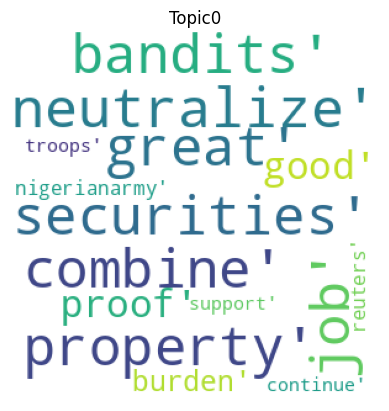

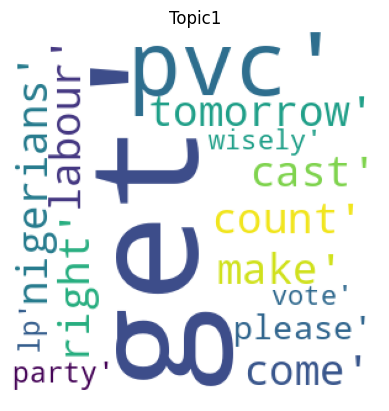

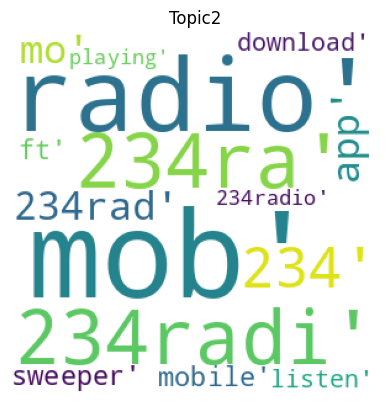

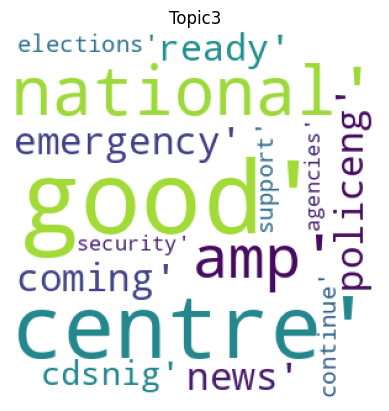

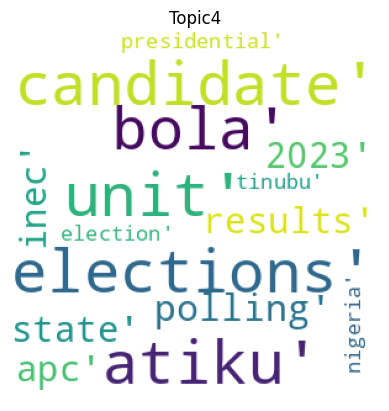

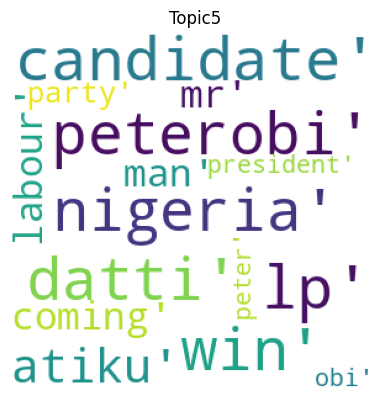

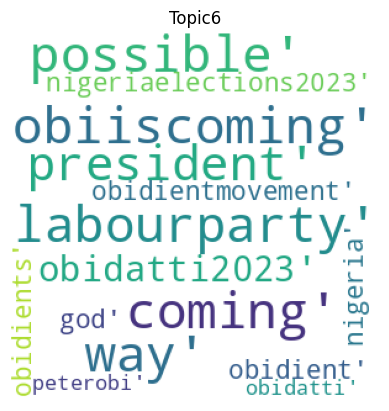

In [109]:
#WordCloud of Top 15 words in NMF topics
for inx, top in enumerate(nmf_mod.components_):
  stuff = [count.get_feature_names_out()[i] for i in top.argsort()[-15:]]
  stuff = str(stuff)
  wc = WordCloud(width=300, height=300,background_color='white').generate(stuff)
  plt.imshow(wc)
  plt.title(f"Topic{inx}")
  plt.axis("off")
  plt.show()

In [114]:
#Add the LDA and NMF titles to the corpus dataframe then exporting to  csv
ldatopic = mods.transform(the_matrix)
nmftopic = nmf_mod.transform(matrix2)
data = pd.DataFrame(data)
data['LDA Topic'] = ldatopic.argmax(axis=1)
data['NMF Topic'] = nmftopic.argmax(axis=1)
data
#data.to_csv("Corpus LDA and NMF topics.csv") #to export to csv
#The csv file has been uploaded to a OneDrive folder and the link will be provided in the report

,text,LDA Topic,NMF Topic
0,#OBI and #wife storm kastina state today.\n\nS...,5,5
1,"If they can’t point to you one project , inves...",5,6
2,@atiku God with his infinite mercy will never ...,5,4
3,Governor @RotimiAkeredolu takes Asiwaju Bola A...,4,4
4,@atiku Salutation is not Love. #Obi is coming,5,5
...,...,...,...
86233,Every democracy is as virile as the culture of...,3,4
86234,in the state tomorrow.\n \nI condemn this unci...,1,3
86235,I have watched with profound disdain a certain...,5,4
86236,I am concerned about how lackeys of political ...,6,4


**Note: The code below executes the NMF model using Pipeline. This enables us use topicwizard which is an amazing NLP visualization tool although it takes a longer time to execute.

The resulting plot can either be viewed using your browser after the code executes or through the .joblib file uploaded to the OneDrive folder linked in the report.**

In [118]:
#Fitting the NMF model using Pipeline
from sklearn.pipeline import Pipeline
nmf_mod = Pipeline(
    [
        ("Term_Matrix", TfidfVectorizer(max_df=0.9, min_df=5, stop_words = SW)),
        ("NMF_mod", NMF(n_components=7, random_state = 42)),
    ]
)
nmf_mod.fit(texts)

Pipeline(steps=[('Term_Matrix',
                 TfidfVectorizer(max_df=0.9, min_df=5,
                                 stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...])),
                ('NMF_mod', NMF(n_components=7, random_state=42))])

In [ ]:
#Installing the library
!pip install topic-wizard

In [121]:
#Data Visualizations of the model results.
import topicwizard

topicwizard.visualize(pipeline=nmf_mod, corpus=texts)

Preprocessing
Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/



INFO:topicwizard.app:Dash is running on http://127.0.0.1:8050/



 * Serving Flask app 'topicwizard.app'
 * Debug mode: off


Address already in use
Port 8050 is in use by another program. Either identify and stop that program, or start the server with a different port.


Open in browser:


<IPython.core.display.Javascript object>

<Thread(Thread-177, stopped 140394826479360)>